#**Τεχνολογία και Ανάλυση Εικόνων και Βίντεο - 2025** <br>
#Άσκηση 1 <br>

# *1. Θεωρητικό Μέρος*

*α. Πώς η τιμή του a επηρεάζει την Gaussian πυραμίδα;* <br>
Η τιμή a αφορά το βαθυπερατό φίλτρο που εφαρμόζεται για το smoothing της εικόνας σε κάθε βήμα του σχηματισμού της Gaussian Pyramid. Ειδικότερα, η παράμετρος αυτή επηρεάζει τη τυπική απόκλιση του φίλτρου, η οποία, κατ' επέκταση, επηρεάζει το εύρος τιμών της καμπύλης. Όσο μικρότερο είναι το a, τόσο πιο πλατιά και ομαλή παρουσιάζεται η καμπύλη των βαρών, δηλαδή αποκόπτονται περισσότερες υψηλές συχνότητες, οπότε παρουσιάζεται πιο έντονο smoothing της εικόνας, δηλαδή αποκόπτεται περισσότερη πληροφορία. Αντίστοιχα, όσο μεγαλύτερο είναι το a, η καμπύλη του φίλτρου έχει μία πιο στενή μορφή με εμφάνιση peak, οπότε έχουμε λιγότερο smoothing της εικόνας, οπότε και λιγότερη απώλεια πληροφορίας. Υπάρχει περίπτωση, η παράμετρος a να είναι τόσο μεγάλη ώστε να μη γίνεται επαρκές smoothing πριν το downsampling, με αποτέλεσμα το aliasing. Το aliasing είναι το φαινόμενο όπου οι υψηλές συχνότητες δεν έχουν αφαιρεθεί πριν γίνει downsampling οπότε δε διατηρείται το integrity της εικόνας κατά την μετέπειτα επαναφορά της εικόνας, καθώς δημιουργούνται ανεξάρτητα patterns, θόρυβος στις άκρες κ.ά. <br>
<br>
*β. Τι ορίζουμε ως εντροπία; Υπολογίστε τη μέγιστη τιμή εντροπίας που μπορεί να έχει μία grayscale εικόνα.* <br>
Εντροπία ορίζεται ως ο ελάχιστος αριθμός από bits/pixel που χρειάζεται για την κωδικοποίηση μιάς εικόνας, δηλαδή η ελάχιστη πληροφορία που χρειαζόμαστε για την αναπαράσταση αυτής. <br>
Ουσιάστικα, θέτει ένα θεωρητικό κάτω φράγμα στο πόσο μπορεί μία εικόνα να συμπιεστεί χωρίς να προκληθεί απώλεια πληροφορίας.<br>
Περιγράφεται μαθηματικά και από τη σχέση του Shannon ως εξής:<br>
$$
H = -\sum_{i} p(i)\,\log_2\bigl(p(i)\bigr)
$$
όπου $p(i)$ η πιθανότητα ενός pixel να έχει μία τιμή φωτεινότητας. <br>
Για μια grayscale εικόνα, κάθε pixel μπορεί να πάρει τιμές στο διάστημα [0, 255] και αν έχω uniform κατανομή, δηλαδή όλα είναι ισοπίθανα με πιθανότητα $\frac{1}{256}$, οπότε η μέγιστη εντροπία υπολογίζεται ως εξής: <br>
$$
H = -\sum_{i=0}^{255} \frac{1}{256}\,\log_2\bigl(\frac{1}{256}\bigr) = -\sum_{i=0}^{255} \frac{1}{256}\,\bigl(-8\bigr) = 8
$$
Οπότε η μέγιστη εντροπία μίας grayscale εικόνας είναι 8 bits/pixel. <br>
<br>
*γ. Πως η επιλογή του μεγέθους του bin επηρεάζει το αποτέλεσμα του κβαντισμού;* <br>
Στην περίπτωση του uniform quantization, το εύρος των τιμών pixel διαιρείται σε "bins" μεγέθους n και η κβαντισμένη τιμή ενός pixel δίνεται από τη "αντιπροσωπευτική" τιμή του bin στην οποία στρογγυλοποιούνται όλες οι τιμές του bin. <br>
Μεγαλύτερο bin σημαίνει λιγότερες τιμές για ένα pixel άρα έχουμε μικρότερο αριθμό επιπέδων κβαντισμού, οπότε αποκόπτεται πληροφορία, και ως αποτέλεσμα μειώνεται η εντροπία. Ενώ, μικρότερο bin σημαίνει μικρότερη απώλεια πληροφορίας άρα εικόνα πιο κοντά στην αρχική. <br>
<br>
*δ. Εξηγήστε πως επηρεάζεται η κβάντιση από το πλήθος των επιπέδων της πυραμίδας;* <br>
Το πλήθος των επιπέδων πυραμίδας, δηλαδή το depth της πυραμίδας, αναπαριστά πόσα επίπεδα θα κβαντιστούν. Οπότε, όσο περισσότερα είναι τα επίπεδα, τόσο περισσότερες κβαντίσεις θα πραγματοποιηθούν, οπότε μεγαλύτερο συνολικό σφάλμα κατά το decode.

#*2. Εργαστηριακό Μέρος*

##Α. Υλοποίηση του αλγορίθμου

In [ ]:
#imports
import numpy as np
from skimage import data
from skimage import io
import matplotlib.pyplot as plt
import cv2
import scipy.stats as st

In [ ]:
#1. GKernel
def GKernel(a=0.4):
  h = np.array([(1/4 - a/2), 1/4, a, 1/4, (1/4 - a/2)])
  h /= np.sum(h)  #Normalization ώστε sum(h) = 1
  H = np.outer(h, h)
  return H

#2. GReduce
def GReduce(I, h):
  if I.ndim == 3: # αν η εικόνα είναι έγχρωμη
    I_out = np.zeros((I.shape[0] // 2, I.shape[1] // 2, 3), dtype=I.dtype)
  else: # αν η εικόνα είναι grayscale
    I_out = np.zeros((I.shape[0] // 2, I.shape[1] // 2), dtype=I.dtype)

  for i in range((I_out.shape[0])):
    for j in range((I_out.shape[1])):
      values = 0
      for m in range(-2, 3):
        for n in range(-2, 3):
          x, y = 2*i + m, 2*j + n
          x = min(max(0, int(x)), I.shape[0] - 1) # για τις οριακές τιμές -> να μη γίνονται 0.
          y = min(max(0, int(y)), I.shape[1] - 1)
          #if 0 <= x < I.shape[0] and 0 <= y < I.shape[1]:
            #values += h[m+2, n+2] * I[x, y]
          values += h[m+2, n+2] * I[x, y]
      I_out[i,j] = values
  I_out = I_out.astype(I.dtype)
  return I_out

#3. GPyramid
def GPyramid(I, a, depth):
  h = GKernel(a)
  G = []
  G.append(I)
  for i in range(1, depth):
    I = GReduce(I, h)
    G.append(I)
  return G

#4. GExpand
def GExpand(I, h):
  I = I.astype(np.float32)

  if I.ndim == 3: # αν η εικόνα είναι έγχρωμη
    I_out = np.zeros((I.shape[0] * 2, I.shape[1] * 2, 3), dtype=np.float32)
  else: # αν η εικόνα είναι grayscale
    I_out = np.zeros((I.shape[0] * 2, I.shape[1] * 2), dtype=np.float32)

  for i in range(I_out.shape[0]):
    for j in range(I_out.shape[1]):
      values = np.zeros(3, dtype=np.float32) if I.ndim == 3 else 0.0

      for m in range(-2, 3):
        for n in range(-2, 3):
          x, y = (i-m)/2, (j-n)/2

          if (x % 1 != 0) or (y % 1 != 0):
            continue #πήγαινε στο επόμενο iteration αν κάποιο από τα x,y δεν είναι ακέραιος

          x, y = int(x), int(y)
          x = min(max(0, x), I.shape[0] - 1)
          y = min(max(0, y), I.shape[1] - 1)

          #if 0 <= x < I.shape[0] and 0 <= y < I.shape[1]:           #values += h[m+2, n+2] * I[x, y]
          values += h[m+2, n+2] * I[x, y]
      I_out[i, j] = 4 * values

  return I_out.astype(np.uint8)

#5. LPyramid
def LPyramid(I, a, depth):
  h = GKernel(a)
  G = GPyramid(I, a, depth)
  L = []

  for i in range(depth-1):
    expanded = GExpand(G[i + 1], h).astype(np.float32)

    if I.ndim == 3:
      sub = np.zeros_like(G[i], dtype=np.float32)
      for c in range(3):
        sub[..., c] = G[i][..., c].astype(np.float32) - expanded[..., c] + 128
    else:
      sub = G[i].astype(np.float32) - expanded + 128

    sub = np.clip(sub, 0, 255)
    L.append(sub.astype(np.uint8))

  L.append(G[-1].astype(np.uint8))

  return L

#6. LPyramid_Decode
def LPyramid_Decode(L, a):
  h = GKernel(a)
  d = len(L)
  D = [L[-1].astype(np.float32)]
  for i in range(d-2, -1, -1):
    exp = GExpand(D[-1], h).astype(np.float32)
    exp_resized = exp[:L[i].shape[0], :L[i].shape[1]]
    D.append(L[i].astype(np.float32) + exp_resized - 128)
  res = D[-1].astype(np.uint8)
  return res

#7. L_Quantization
def L_Q(n, I):
  m = np.round(I/n)
  C = m*n
  return C.astype(np.uint8)

##Β. Δοκιμές αλγορίθμου

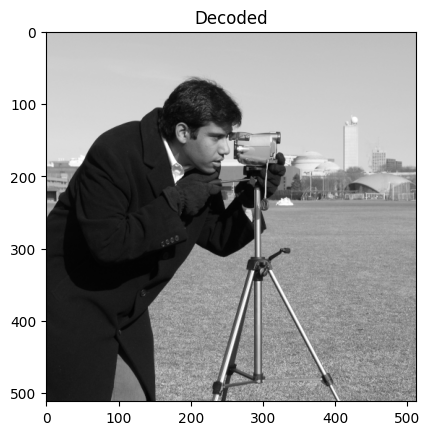

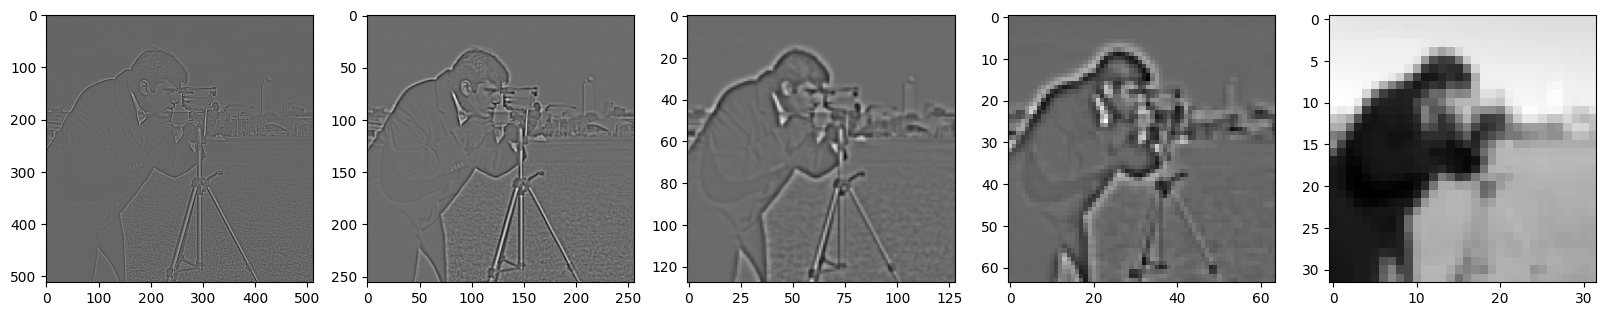

Reconstructed image is identical to the original.


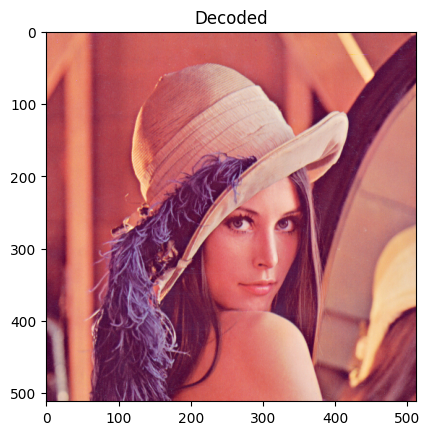

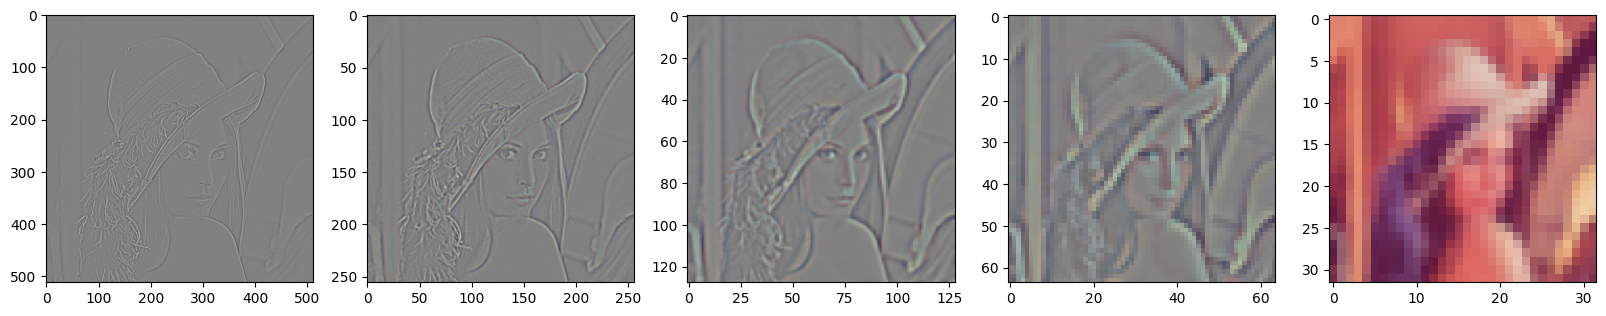

Reconstructed image is identical to the original.


In [ ]:
#1.
a = 0.4
camera = data.camera()
lenaki = io.imread('lena.png')
images = [camera, lenaki]
for image in images:
  LP = LPyramid(image, a, 5)
  LPD = LPyramid_Decode(LP, a)

  plt.figure()
  plt.imshow(LPD, cmap="gray" if image.ndim == 2 else None)
  plt.title("Decoded")
  plt.show()

  f, ax = plt.subplots(1, len(LP), figsize=(20,10))
  for k in range(len(LP)):
    ax[k].imshow(LP[k], cmap="gray" if image.ndim == 2 else None)

  plt.show()
  if np.array_equal(image, LPD):
    print("Reconstructed image is identical to the original.")
  else:
    print("Reconstructed image differs from the original.")

In [ ]:
d_values = [x for x in range(3, 7)]
a_values = [x / 10 for x in range(3, 8)]

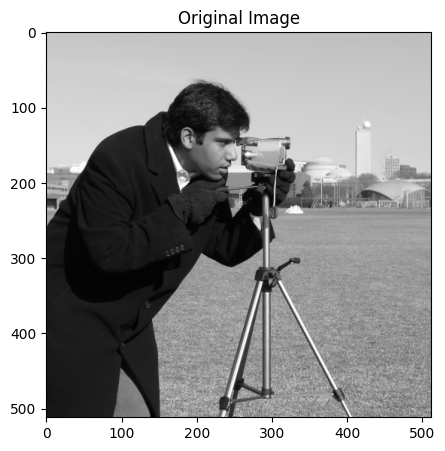

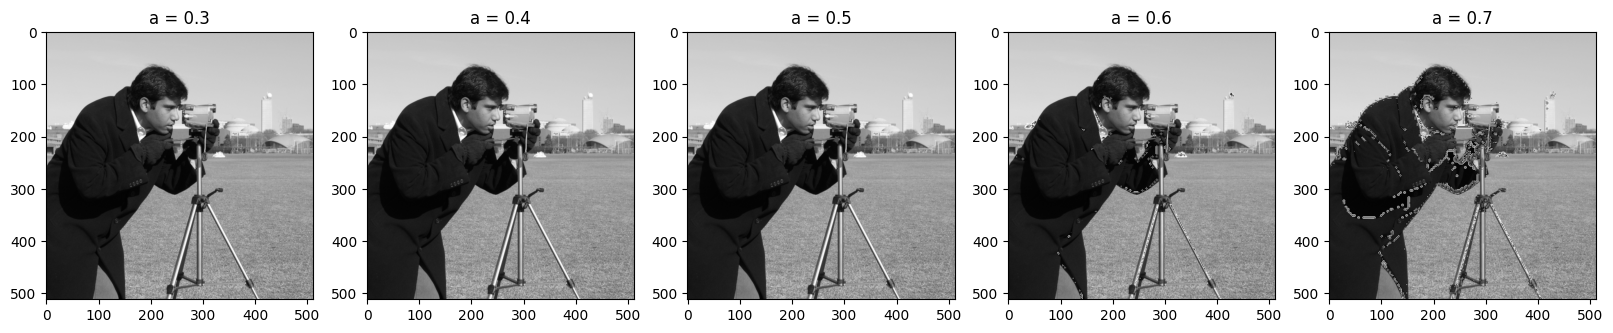

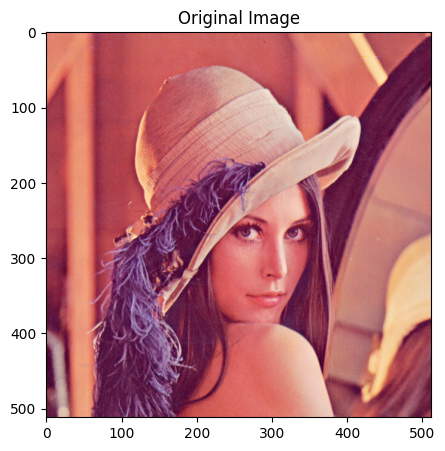

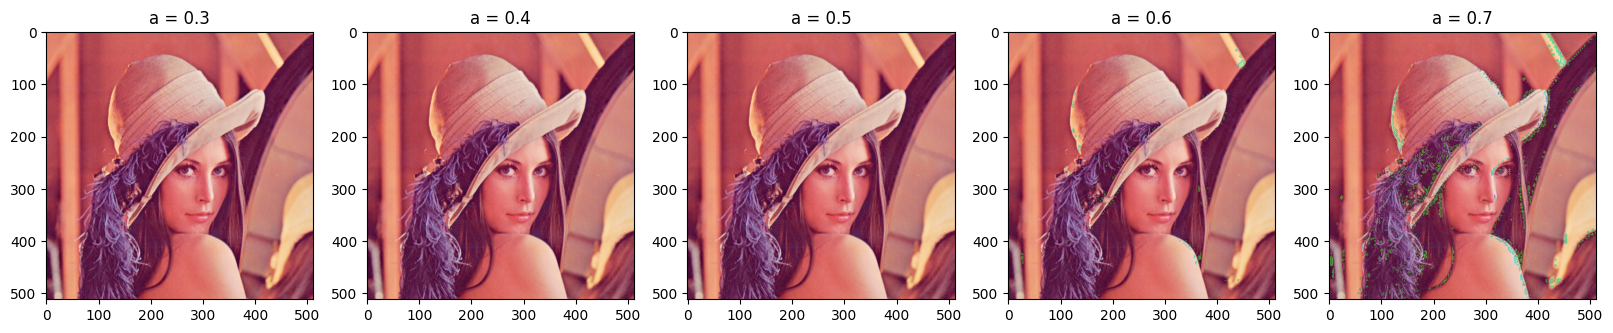

In [ ]:
#2.

for image in images:
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap="gray" if image.ndim == 2 else None)
    plt.title("Original Image")
    plt.axis("on")
    plt.show()

    fig, axes = plt.subplots(1, len(a_values), figsize=(20, 5))

    for i, a in enumerate(a_values):
        LP = LPyramid(image, a, 5)
        LPD = LPyramid_Decode(LP, a)

        axes[i].imshow(LPD, cmap="gray" if image.ndim == 2 else None)
        axes[i].set_title(f"a = {a}")
        axes[i].axis("on")

    plt.show()


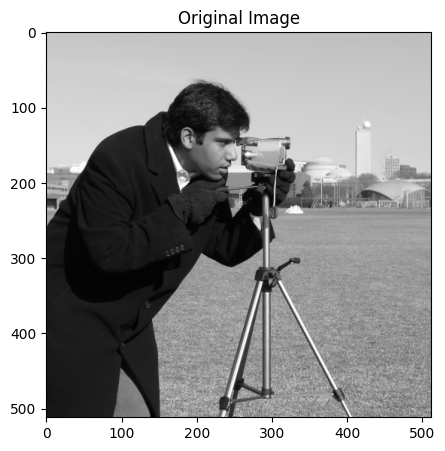

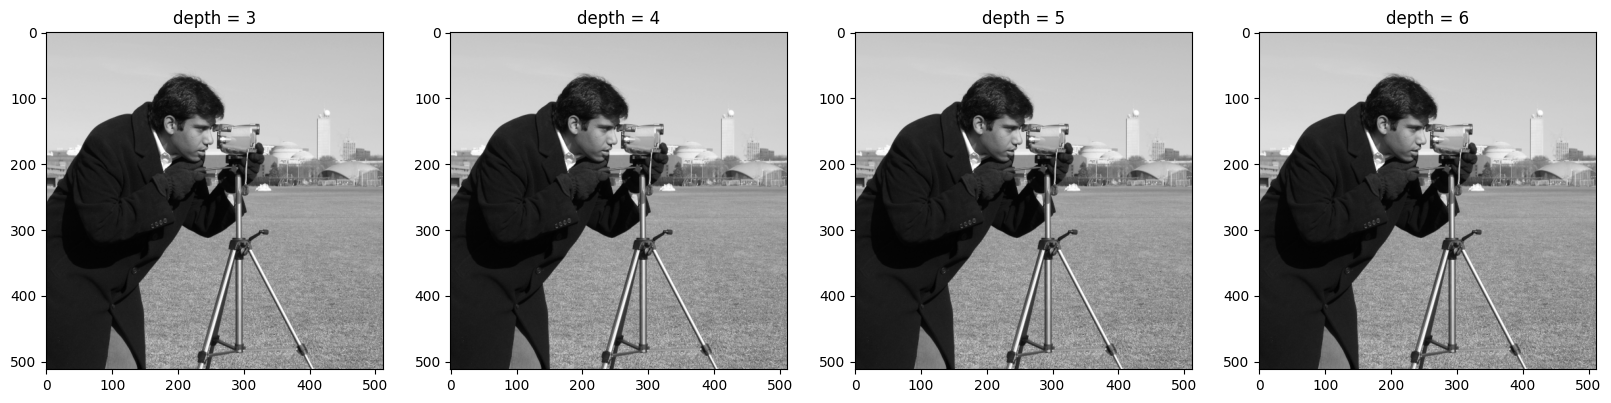

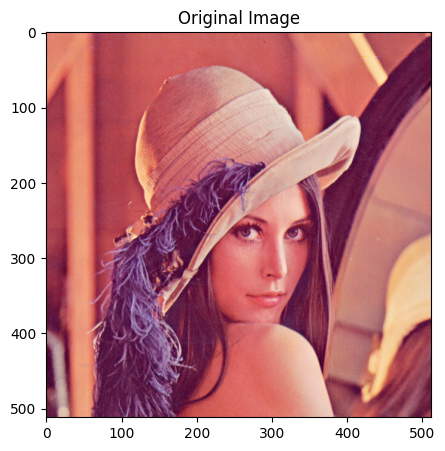

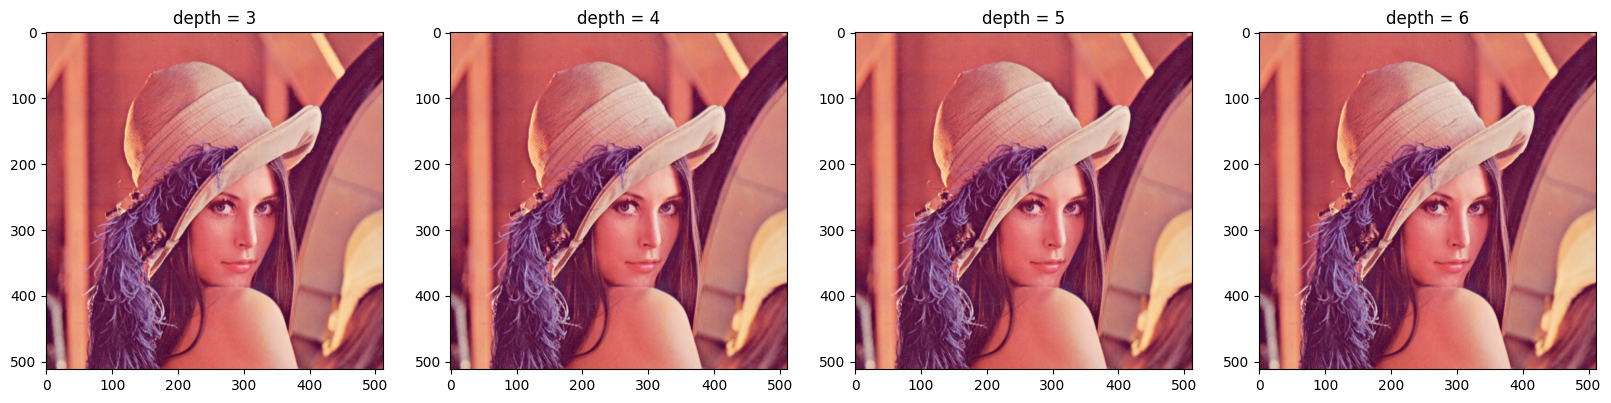

In [ ]:
#3.
a = 0.5

for image in images:
    plt.figure(figsize=(5, 5))
    plt.imshow(image, cmap="gray" if image.ndim == 2 else None)
    plt.title("Original Image")
    plt.axis("on")
    plt.show()

    fig, axes = plt.subplots(1, len(d_values), figsize=(20, 5))

    for i, d in enumerate(d_values):
        LP = LPyramid(image, a, d)
        LPD = LPyramid_Decode(LP, a)

        axes[i].imshow(LPD, cmap="gray" if image.ndim == 2 else None)
        axes[i].set_title(f"depth = {d}")
        axes[i].axis("on")

    plt.show()


In [ ]:
#4.
#Function for calculating the histogram of a Laplacian Pyramid of depth d
def histogram(P, d):
  if P[0].ndim == 2: #for grayscale images
    sum_hist = np.zeros([256, 1], np.float64)
    for n in range(d):
      hist = np.histogram(P[n], bins=256, range=(0, 256))[0].reshape(-1, 1)
      plt.plot(hist, 'k') #plot in black for grayscale
      sum_hist += hist
    return sum_hist / sum_hist.max() #normalize and return

  elif P[0].ndim == 3: #for RGB images
    sum_hist_r = np.zeros([256, 1], np.float64)
    sum_hist_g = np.zeros([256, 1], np.float64)
    sum_hist_b = np.zeros([256, 1], np.float64)

    for n in range(d):
      hist_r = np.histogram(P[n][:, :, 0], bins=256, range=(0, 256))[0].reshape(-1, 1)
      hist_g = np.histogram(P[n][:, :, 1], bins=256, range=(0, 256))[0].reshape(-1, 1)
      hist_b = np.histogram(P[n][:, :, 2], bins=256, range=(0, 256))[0].reshape(-1, 1)

      plt.plot(hist_r, 'r') #red
      plt.plot(hist_g, 'g') #green
      plt.plot(hist_b, 'b') #blue

      sum_hist_r += hist_r
      sum_hist_g += hist_g
      sum_hist_b += hist_b

    #normalize and return
    return sum_hist_r / sum_hist_r.max(), sum_hist_g / sum_hist_g.max(), sum_hist_b / sum_hist_b.max()

#Function for calculating the entropy of image given its histogram
def entropy_calc(histogram):
  if isinstance(histogram, tuple):
    entropy_r = st.entropy(histogram[0].flatten() + 1e-10, base=2)
    entropy_g = st.entropy(histogram[1].flatten() + 1e-10, base=2)
    entropy_b = st.entropy(histogram[2].flatten() + 1e-10, base=2)
    print(f"Entropy (R,G,B): {entropy_r}, {entropy_g}, {entropy_b}")
    en = (entropy_r + entropy_g + entropy_b) / 3
  else:
    entropy = st.entropy(histogram.flatten() + 1e-10, base=2)
    print(f"Entropy (Grayscale): {entropy}")
    en = entropy
  return en

In [ ]:
# Function that plots histograms of Gaussian Pyramids for different Depths and a parameters
def plot_hist(I, a_values, depth_values):
  max_plots = max(len(depth_values), len(a_values))
  f, axs = plt.subplots(1, max_plots, figsize=(24, 7))
  axs = np.array(axs).reshape(-1)
  count = 0

  entropies = []

  for a in a_values:
    for depth in depth_values:
        channels = I.shape[-1] if I.ndim == 3 else 1

        if channels == 3: #rgb case
          hist = []
          colors = ['r','g','b']

          for c in range(channels):
            pyramid = LPyramid(I, a, depth)
            temp = histogram(pyramid, depth)[c]
            axs[count].plot(temp, colors[c])
            hist.append(temp)

          entropy = np.mean([entropy_calc(h) for h in hist])

        else: #grayscale case
          pyramid = LPyramid(I, a, depth)
          hist = histogram(pyramid, depth)
          axs[count].plot(hist, 'k')
          entropy = entropy_calc(hist)

        entropies.append((a, depth, entropy))

        axs[count].set_title(f'Depth = {depth}, Parameter a = {a}', fontsize=10)
        count += 1

        print(f'Depth = {depth}, a = {a}: Entropy = {np.round(entropy, 4)}, Variance = {np.round(np.var(hist), 4)}')

  a_list, depth_list, entropy_list = zip(*entropies)
  plt.figure()
  plt.plot(a_list, entropy_list, marker='o', linestyle='-')
  plt.xlabel('a values')
  plt.ylabel('Entropy')
  plt.title('Entropy vs a values')
  plt.grid(True)
  plt.show()

  plt.figure()
  plt.plot(depth_list, entropy_list, marker='s', linestyle='--', color='r')
  plt.xlabel('Depth values')
  plt.ylabel('Entropy')
  plt.title('Entropy vs Depth values')
  plt.grid(True)
  plt.show()

  return pyramid, hist, entropies


Entropy (Grayscale): 4.613770696739137
Entropy (Grayscale): 5.0080191182661045
Entropy (Grayscale): 4.8994447951445546
Depth = 5, a = 0.3: Entropy = 4.8404, Variance = 0.0179
Entropy (Grayscale): 4.425452511900948
Entropy (Grayscale): 4.838171887947531
Entropy (Grayscale): 4.784065620382484
Depth = 5, a = 0.4: Entropy = 4.6826, Variance = 0.0177
Entropy (Grayscale): 4.140369962494599
Entropy (Grayscale): 4.588511860172367
Entropy (Grayscale): 4.6231536576490235
Depth = 5, a = 0.5: Entropy = 4.4507, Variance = 0.0166
Entropy (Grayscale): 4.015344218092313
Entropy (Grayscale): 4.475573840286071
Entropy (Grayscale): 4.55152573140399
Depth = 5, a = 0.6: Entropy = 4.3475, Variance = 0.0167
Entropy (Grayscale): 4.448309383012407
Entropy (Grayscale): 4.881478433827416
Entropy (Grayscale): 4.8849981090798265
Depth = 5, a = 0.7: Entropy = 4.7383, Variance = 0.0208


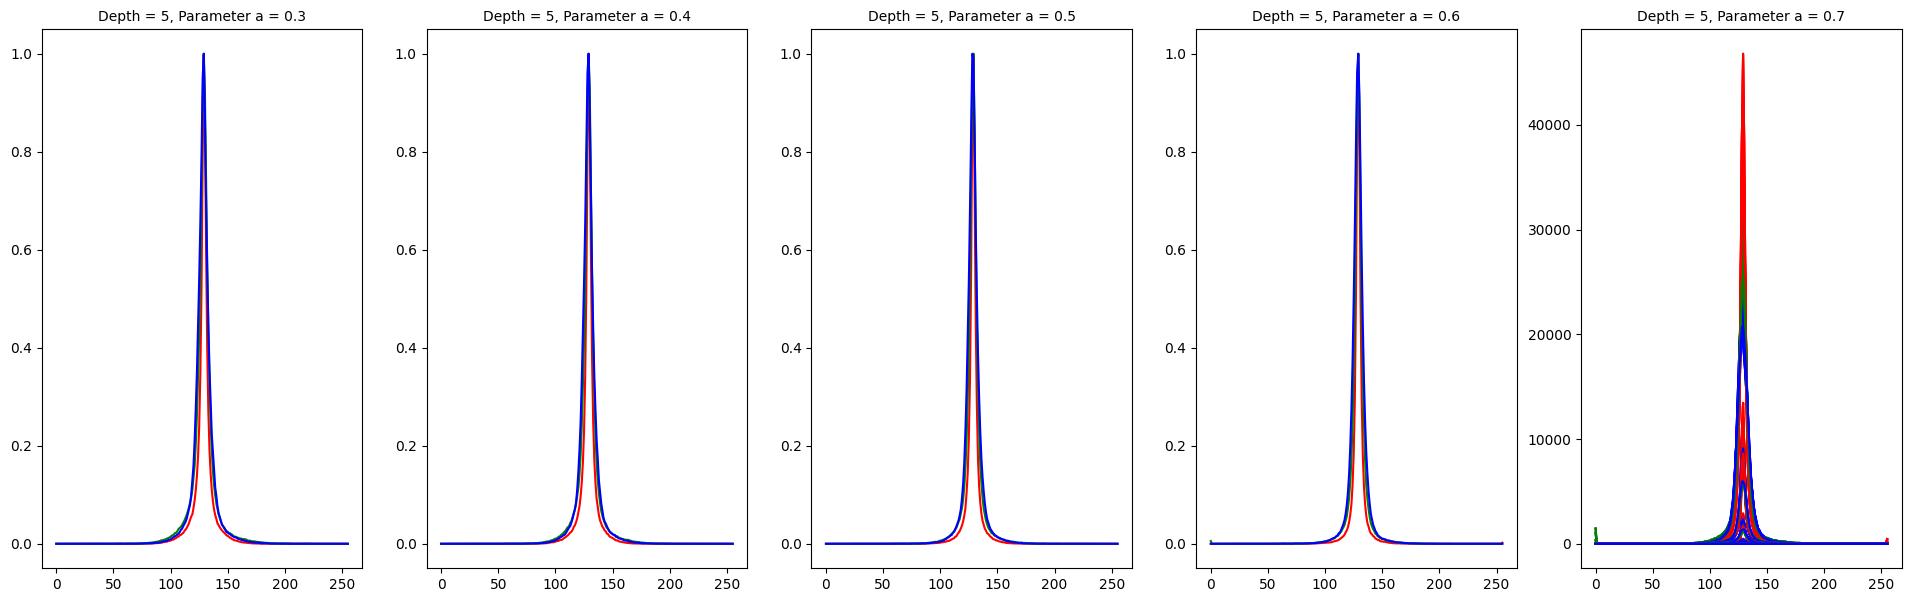

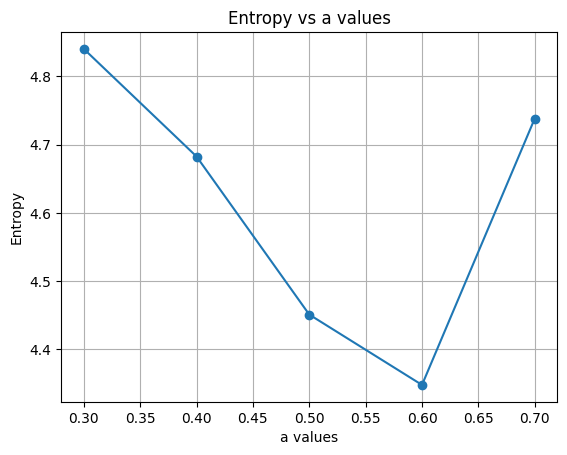

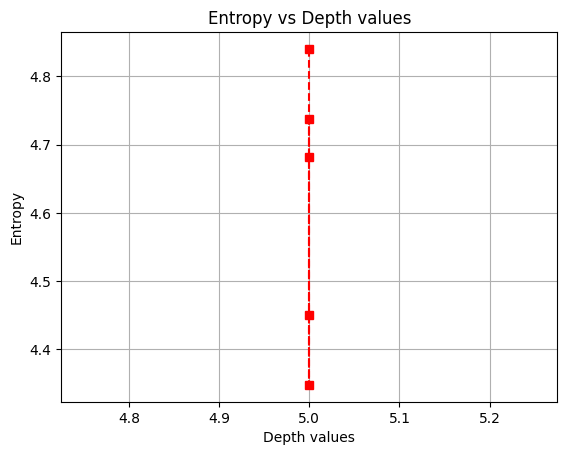

Entropy (Grayscale): 4.681984878219142
Entropy (Grayscale): 5.054019096112409
Entropy (Grayscale): 5.0050317984103
Depth = 3, a = 0.4: Entropy = 4.9137, Variance = 0.0181
Entropy (Grayscale): 4.476214935025187
Entropy (Grayscale): 4.878570189731212
Entropy (Grayscale): 4.828080046146705
Depth = 4, a = 0.4: Entropy = 4.7276, Variance = 0.0177
Entropy (Grayscale): 4.425452511900948
Entropy (Grayscale): 4.838171887947531
Entropy (Grayscale): 4.784065620382484
Depth = 5, a = 0.4: Entropy = 4.6826, Variance = 0.0177
Entropy (Grayscale): 4.413477013754782
Entropy (Grayscale): 4.829697524083544
Entropy (Grayscale): 4.7736207463422655
Depth = 6, a = 0.4: Entropy = 4.6723, Variance = 0.0177


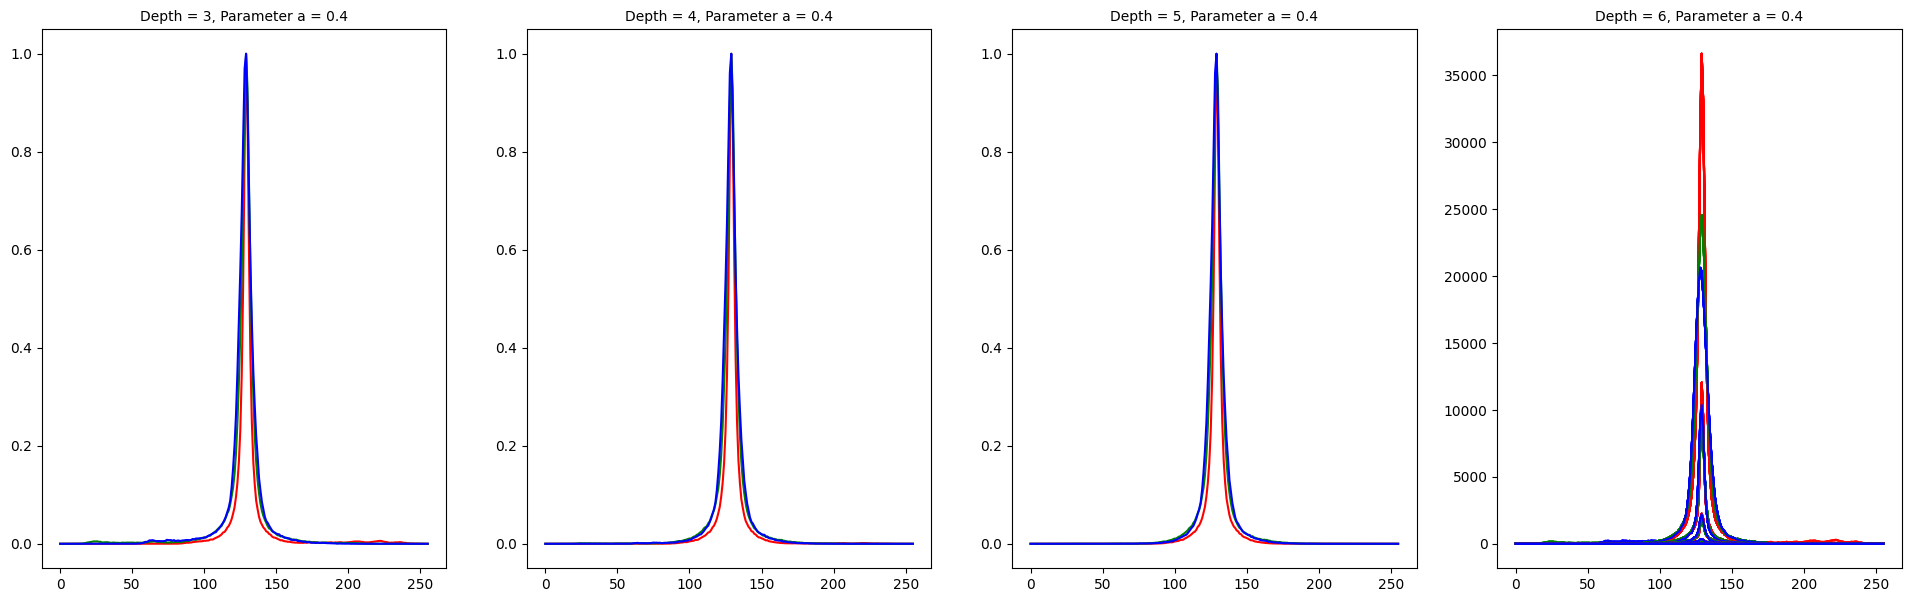

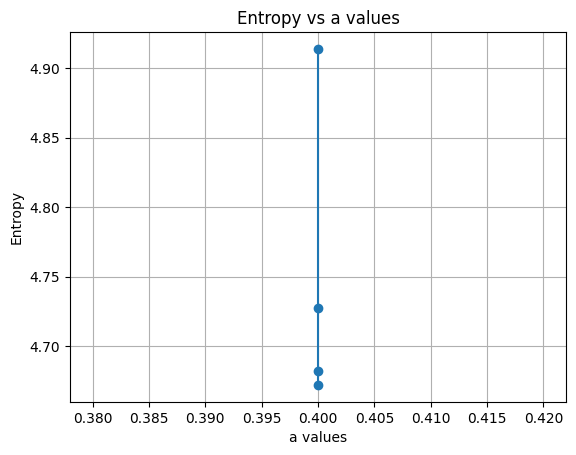

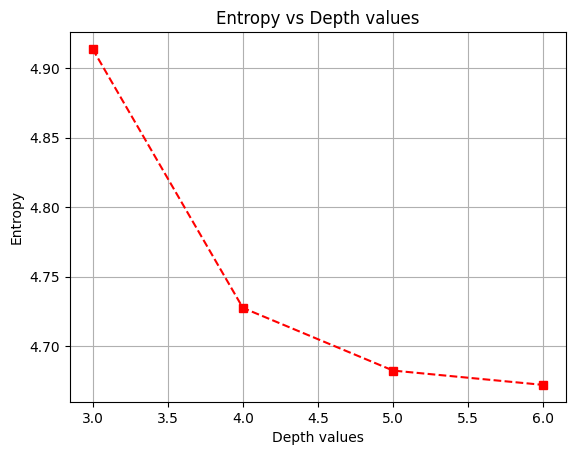

Entropy (Grayscale): 4.598912807072717
Depth = 5, a = 0.3: Entropy = 4.5989, Variance = 0.0059
Entropy (Grayscale): 4.475371403264773
Depth = 5, a = 0.4: Entropy = 4.4754, Variance = 0.0059
Entropy (Grayscale): 4.259806687890159
Depth = 5, a = 0.5: Entropy = 4.2598, Variance = 0.0073
Entropy (Grayscale): 4.255001522043487
Depth = 5, a = 0.6: Entropy = 4.255, Variance = 0.0065
Entropy (Grayscale): 4.595119855525287
Depth = 5, a = 0.7: Entropy = 4.5951, Variance = 0.0065


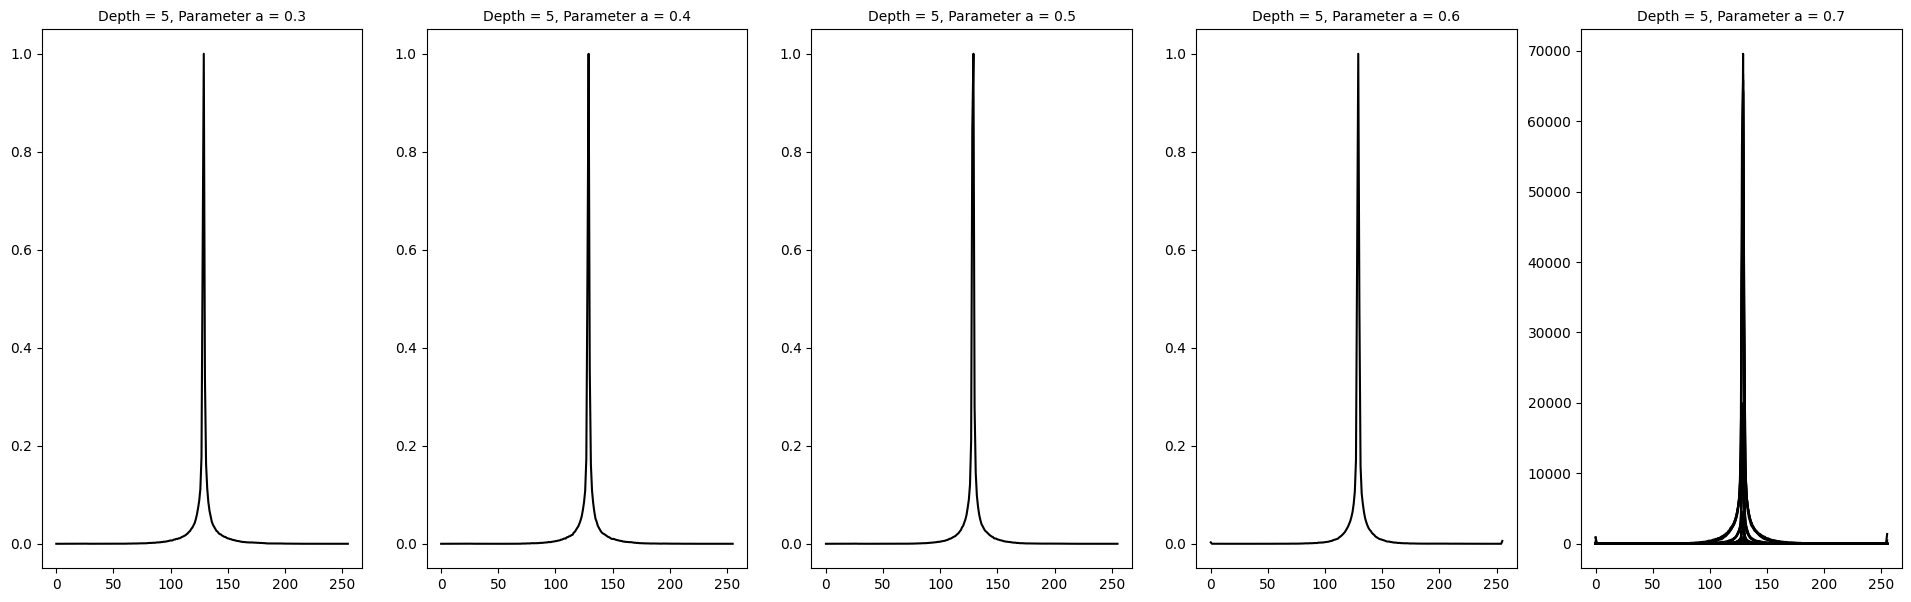

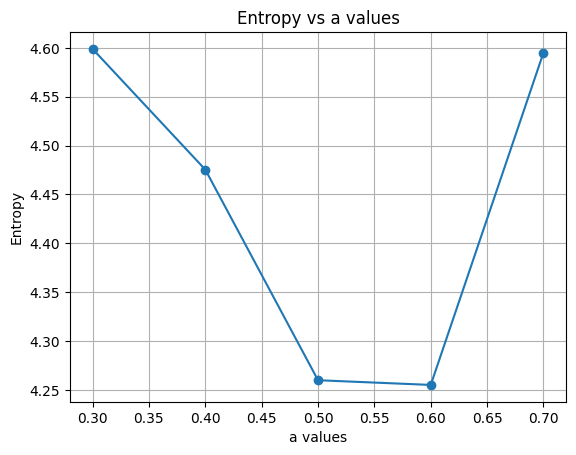

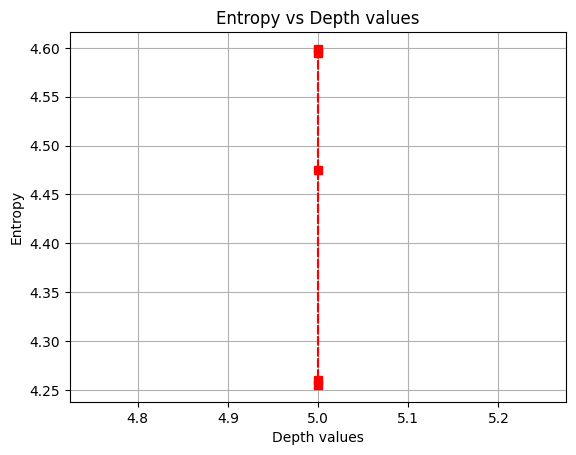

Entropy (Grayscale): 4.755930969855798
Depth = 3, a = 0.4: Entropy = 4.7559, Variance = 0.0059
Entropy (Grayscale): 4.534982495485227
Depth = 4, a = 0.4: Entropy = 4.535, Variance = 0.0059
Entropy (Grayscale): 4.475371403264773
Depth = 5, a = 0.4: Entropy = 4.4754, Variance = 0.0059
Entropy (Grayscale): 4.46084996397653
Depth = 6, a = 0.4: Entropy = 4.4608, Variance = 0.0059


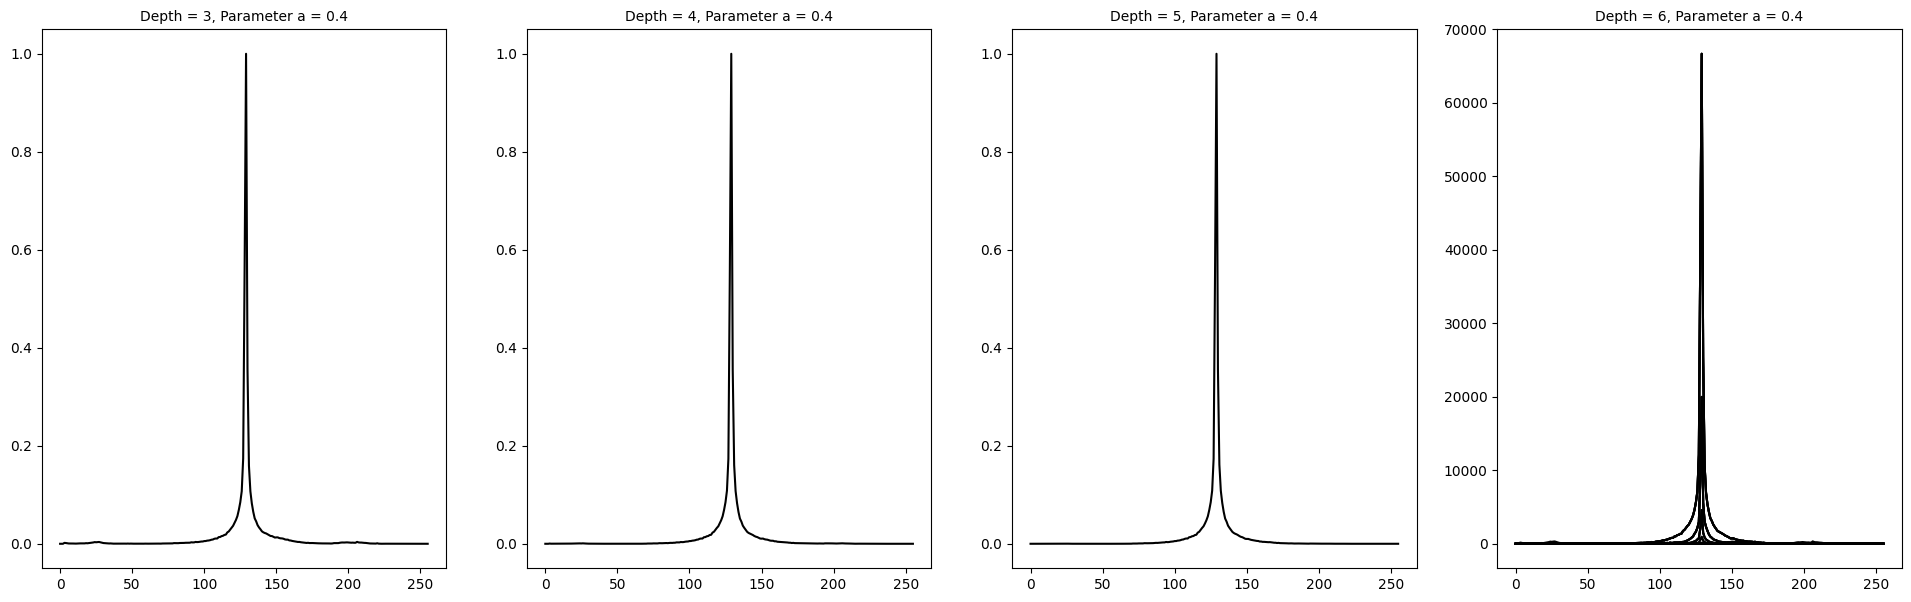

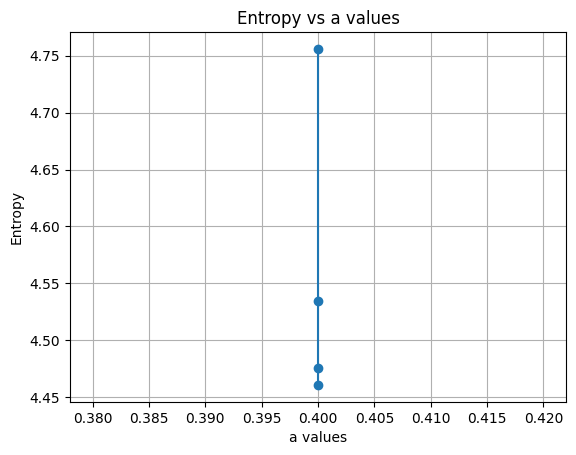

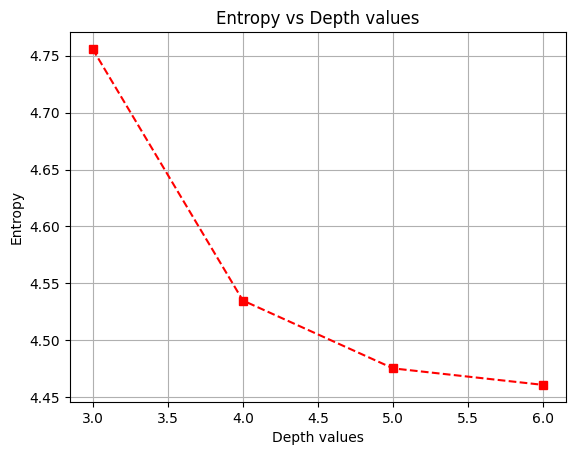

In [ ]:
lenakiP, lenakiH, E = plot_hist(lenaki, a_values, depth_values = [5])
lenakiP2, lenakiH2, E2 = plot_hist(lenaki, a_values=[0.4], depth_values=d_values)

cameraP, cameraH, E = plot_hist(camera, a_values, depth_values = [5])
cameraP2, cameraH2, E2 = plot_hist(camera, a_values=[0.4], depth_values=d_values)


**Σχολιασμός Γραφημάτων**
Για κάθε πείραμα υπάρχουν 2 είδη διαγραμμάτων, πρώτα εμφανίζονται τα διαγράμματα διακύμανσης της Gaussian συνάρτησης, ενώ έπειτα εμφανίζονται τα διαγράμματα της εντροπίας.
1. Lena με σταθερό depth = 5, μεταβλητή τιμή a <br>
Παρατηρώ πως η τιμή της εντροπίας μειώνεται σχεδόν γραμμικά με το a μέχρι την τιμή 0.6 ενώ μετά αυξάνεται απότομα. Αυτό επιβεβαιώνει πως η τιμή αυτή προκαλεί aliasing και εμφανίζονται θόρυβος και ανεπιθύμητα patterns.<br>
2. Lena με σταθερό a = 0.4, μεταβλητή τιμή depth <br>
Παρατηρώ πως η τιμή της εντροπίας μειώνεται όσο αυξάνεται το πλήθος των επιπέδων της πυραμίδας. <br>
3. Camera με σταθερό depth = 5, μεταβλητή τιμή a <br>
Η τιμή της εντροπίας εμφανίζει παρόμοια συμπεριφορά με την περίπτωση της RGB εικόνας. <br>
4. Camera με σταθερό a = 0.4, μεταβλητή τιμή depth <br>
Αντίστοιχα με Lena.

In [ ]:
#5.
def find_optimal_a(I, a_values, depth=5):
  all_entropies = []
  for a in a_values:
    pyramid = LPyramid(I, a, depth)
    entropies = [entropy_calc(histogram([p], 1)) for p in pyramid]
    all_entropies.append(entropies)

  all_entropies = np.array(all_entropies)
  optimal_a_values = []

  for level in range(depth):
    min_entropy = np.min(all_entropies[:, level])
    best_a = a_values[np.argmin(all_entropies[:, level])]
    optimal_a_values.append((level + 1, best_a, min_entropy))

  for level, best_a, min_entropy in optimal_a_values:
    print(f"Level {level}: Optimal a = {best_a}, Min Entropy = {min_entropy:.4f}")

  return optimal_a_values

Entropy (R,G,B): 4.504240706962862, 4.9525361880803995, 4.954173676032102
Entropy (R,G,B): 4.588832033087818, 4.859150925546987, 4.386595615122604
Entropy (R,G,B): 5.182441266078767, 5.415135001977229, 4.851205145569643
Entropy (R,G,B): 5.725172472567762, 5.959935333895561, 5.298647331055352
Entropy (R,G,B): 6.839347458162017, 7.065965464710596, 6.435035176416885
Entropy (R,G,B): 4.305707371382427, 4.776433524070847, 4.837050970490511
Entropy (R,G,B): 4.426966454957914, 4.70940938799559, 4.287093523511911
Entropy (R,G,B): 5.00313007335124, 5.235501016194726, 4.691680364494117
Entropy (R,G,B): 5.581990322376886, 5.801409297958684, 5.178017040076879
Entropy (R,G,B): 6.9214993523352994, 7.143193471368359, 6.468896679184777
Entropy (R,G,B): 4.009398110282755, 4.5160384139517875, 4.668994733456321
Entropy (R,G,B): 4.168147831628394, 4.493469413985424, 4.1707441341613976
Entropy (R,G,B): 4.718500970118571, 4.961243575426468, 4.463640787825945
Entropy (R,G,B): 5.348899286847688, 5.58411723396

[(1, 0.6, np.float64(4.2406522858461235)),
 (2, 0.5, np.float64(4.277453793258405)),
 (3, 0.5, np.float64(4.714461777790327)),
 (4, 0.5, np.float64(5.3057175222295925)),
 (5, 0.3, np.float64(6.7801160330964985))]

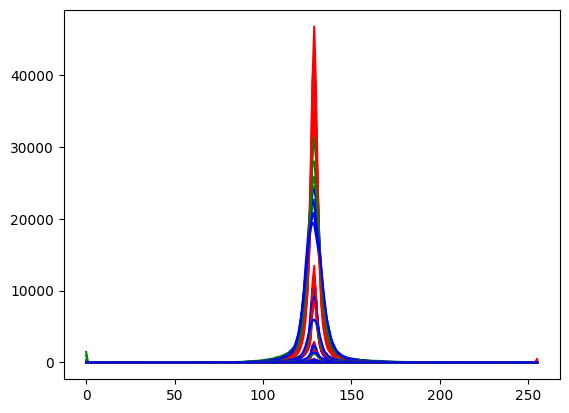

In [ ]:
find_optimal_a(lenaki, a_values, depth=5)

Entropy (Grayscale): 4.635319261814303
Entropy (Grayscale): 4.308416323742158
Entropy (Grayscale): 4.466737209529203
Entropy (Grayscale): 4.831582494862286
Entropy (Grayscale): 6.899990545214883
Entropy (Grayscale): 4.492417778889303
Entropy (Grayscale): 4.24768218190533
Entropy (Grayscale): 4.401444212508552
Entropy (Grayscale): 4.688714741479014
Entropy (Grayscale): 6.91156184098591
Entropy (Grayscale): 4.241206727836219
Entropy (Grayscale): 4.144523550798154
Entropy (Grayscale): 4.310527332745317
Entropy (Grayscale): 4.530084850311844
Entropy (Grayscale): 6.855822868450085
Entropy (Grayscale): 4.1802654650222975
Entropy (Grayscale): 4.295829469240826
Entropy (Grayscale): 4.499274149610528
Entropy (Grayscale): 4.771385380476669
Entropy (Grayscale): 6.892992221073382
Entropy (Grayscale): 4.455878100692233
Entropy (Grayscale): 4.806702979643852
Entropy (Grayscale): 5.062150587334736
Entropy (Grayscale): 5.375658330753124
Entropy (Grayscale): 7.043408924219153
Level 1: Optimal a = 0.6, 

[(1, 0.6, np.float64(4.1802654650222975)),
 (2, 0.5, np.float64(4.144523550798154)),
 (3, 0.5, np.float64(4.310527332745317)),
 (4, 0.5, np.float64(4.530084850311844)),
 (5, 0.5, np.float64(6.855822868450085))]

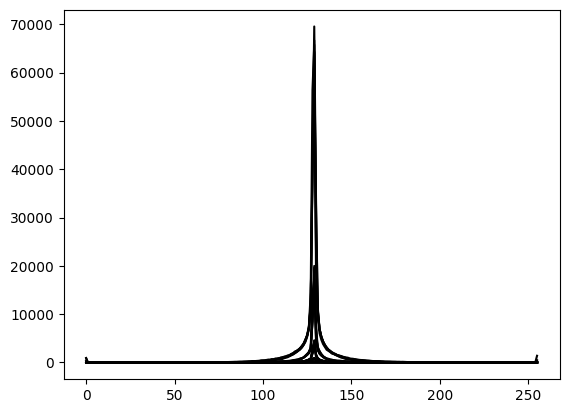

In [ ]:
find_optimal_a(camera, a_values, depth=5)

Το βέλτιστο a δίνεται με βάση τη μικρότερη εντροπία. Λαμβάνοντας υπ' όψιν τα παραπάνω αποτελέσματα, ως βέλτιστο a έχω το 0.5

In [ ]:
#6.
a = 0.5
lenaki_LP = LPyramid(lenaki, 0.5, 5)
camera_LP = LPyramid(camera, 0.5, 5)

Πείραμα 1

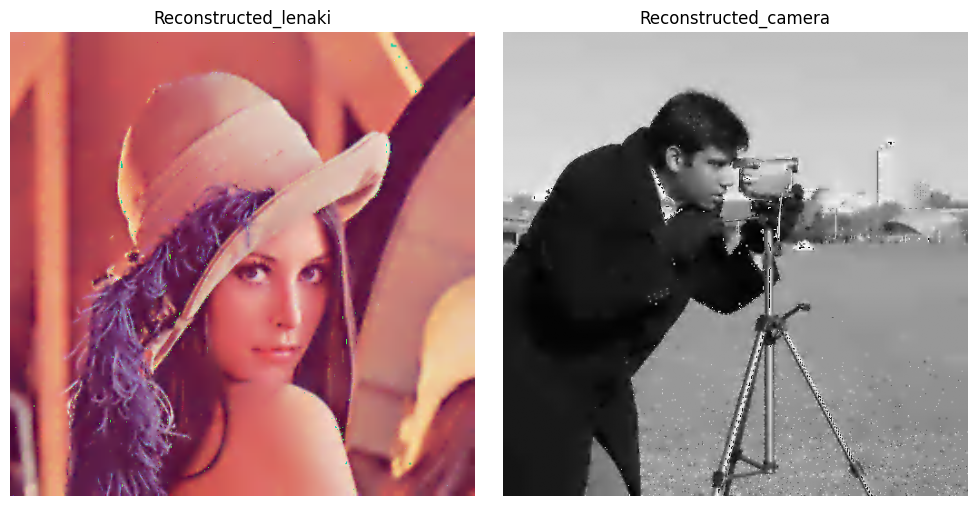

In [ ]:
bin_values = [64, 32, 16, 8, 4]
pyramids = {'lenaki': lenaki_LP, 'camera': camera_LP}

quantized_pyramids = {}
reconstructed_images = {}

for img_name, pyramid in pyramids.items():
  quantized_levels = [L_Q(bin_values[i], pyramid[i]) for i in range(len(pyramid))]
  reconstructed_images[f"Reconstructed_{img_name}"] = LPyramid_Decode(quantized_levels, a)

fig, axes = plt.subplots(1, len(reconstructed_images), figsize=(10, 5))
axes = np.atleast_1d(axes)

for ax, (var_name, img) in zip(axes, reconstructed_images.items()):
  ax.imshow(img, cmap='gray' if img.ndim == 2 else None)
  ax.set_title(var_name)
  ax.axis('off')

plt.tight_layout()
plt.show()


Πείραμα 2

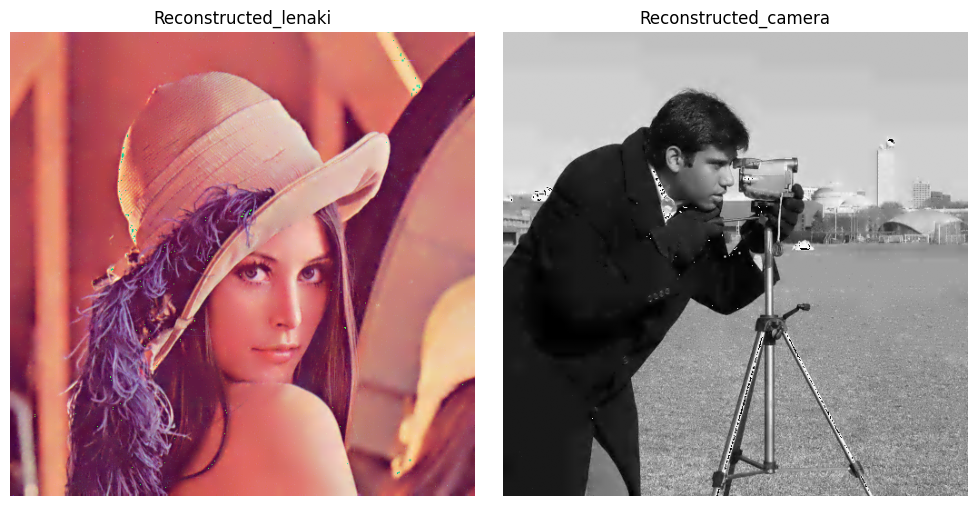

In [ ]:
bin_values = [16, 16, 8, 8, 8]
pyramids = {'lenaki': lenaki_LP, 'camera': camera_LP}

quantized_pyramids = {}
reconstructed_images = {}

for img_name, pyramid in pyramids.items():
  quantized_levels = [L_Q(bin_values[i], pyramid[i]) for i in range(len(pyramid))]
  reconstructed_images[f"Reconstructed_{img_name}"] = LPyramid_Decode(quantized_levels, a)

fig, axes = plt.subplots(1, len(reconstructed_images), figsize=(10, 5))
axes = np.atleast_1d(axes)

for ax, (var_name, img) in zip(axes, reconstructed_images.items()):
  ax.imshow(img, cmap='gray' if img.ndim == 2 else None)
  ax.set_title(var_name)
  ax.axis('off')

plt.tight_layout()
plt.show()


Πείραμα 3

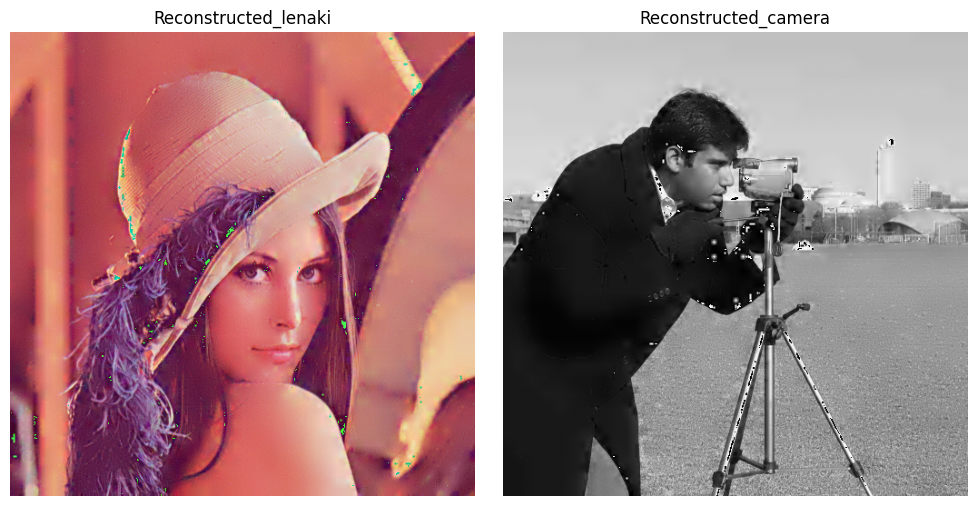

In [ ]:
bin_values = [8, 16, 32, 16, 4]
pyramids = {'lenaki': lenaki_LP, 'camera': camera_LP}

quantized_pyramids = {}
reconstructed_images = {}

for img_name, pyramid in pyramids.items():
  quantized_levels = [L_Q(bin_values[i], pyramid[i]) for i in range(len(pyramid))]
  reconstructed_images[f"Reconstructed_{img_name}"] = LPyramid_Decode(quantized_levels, a)

fig, axes = plt.subplots(1, len(reconstructed_images), figsize=(10, 5))
axes = np.atleast_1d(axes)

for ax, (var_name, img) in zip(axes, reconstructed_images.items()):
  ax.imshow(img, cmap='gray' if img.ndim == 2 else None)
  ax.set_title(var_name)
  ax.axis('off')

plt.tight_layout()
plt.show()


Παρατηρώ ότι όταν βάζω μεγάλο μέγεθος bin στο πρώτο επίπεδο της Laplacian Pyramid, έχω καλύτερα αποτελέσματα, κάτι που είναι αναμενόμενο καθώς το επίπεδο αυτό είναι το επίπεδο με τη λιγότερη πληροφορία. Συνεπώς, δε χάνω πληροφορία, ενώ ταυτόχρονα εξοικονομώ pixels.